In [2]:
%load_ext dotenv 
%dotenv 

import os 
import sys 
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [3]:
import dask.dataframe as dd 
import pandas as pd 
import numpy as np 
import os 
from glob import glob

c:\Users\david\miniconda3\envs\dsi_participant\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
C:\Users\david\AppData\Local\Temp\ipykernel_13664\2679745383.py:1: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can b

In [5]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780684 entries, 0 to 2780683
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ticker           object        
 1   Date             datetime64[ns]
 2   Open             float64       
 3   High             float64       
 4   Low              float64       
 5   Close            float64       
 6   Adj Close        float64       
 7   Volume           int64         
 8   sector           object        
 9   subsector        object        
 10  year             int32         
 11  Close_lag_1      float64       
 12  returns          float64       
 13  positive_return  int32         
 14  target           float64       
dtypes: datetime64[ns](1), float64(8), int32(2), int64(1), object(3)
memory usage: 297.0+ MB


In [6]:
df.head()

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
0,HUM,2000-01-03,8.3125,8.375,7.3750,7.5625,6.752523,1287300,Health Care,Managed Health Care,2000,10.0000,-0.243750,0,1.0
1,HUM,2000-01-04,7.3750,7.875,7.3750,7.6250,6.808329,1238300,Health Care,Managed Health Care,2000,7.5625,0.008264,1,1.0
2,HUM,2000-01-05,7.5000,7.875,7.5000,7.8125,6.975748,1096300,Health Care,Managed Health Care,2000,7.6250,0.024590,1,1.0
3,HUM,2000-01-06,7.7500,8.250,7.5000,8.1250,7.254776,1026700,Health Care,Managed Health Care,2000,7.8125,0.040000,1,1.0
4,HUM,2000-01-07,8.1875,9.125,8.0625,8.7500,7.812837,2419300,Health Care,Managed Health Care,2000,8.1250,0.076923,1,0.0


# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [ ]:
df.sample(n=5)

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
2185767,VRTX,2021-10-19,182.059998,185.600006,181.110001,185.410004,185.410004,2011200,Health Care,Biotechnology,2021,180.800003,0.025498,1,1.0
2435443,DG,2024-07-29,118.099998,119.769997,116.220001,117.360001,116.538620,1810500,Consumer Staples,Consumer Staples Merchandise Retail,2024,118.089996,-0.006182,0,1.0
765492,FMC,2024-01-24,58.110001,58.439999,56.270000,57.009998,55.415821,1326600,Materials,Fertilizers & Agricultural Chemicals,2024,57.820000,-0.014009,0,1.0
2634494,TRMB,2014-12-26,27.520000,27.780001,27.250000,27.290001,27.290001,507500,Information Technology,Electronic Equipment & Instruments,2014,27.340000,-0.001829,0,0.0
2614473,RVTY,2004-06-07,19.850000,20.639999,19.850000,20.620001,17.599592,505800,Health Care,Health Care Equipment,2004,19.750000,0.044051,1,1.0


In [10]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

Look at the distribution of tickers.

In [11]:
idx = df['ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5511, 15), (55109, 15))

<Axes: xlabel='ticker'>

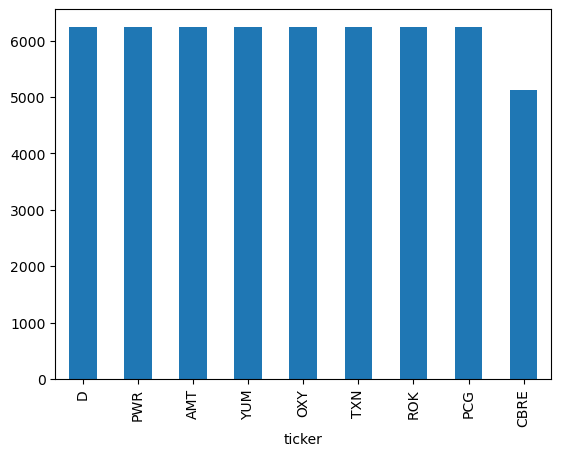

In [12]:
small_df['ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='ticker'>

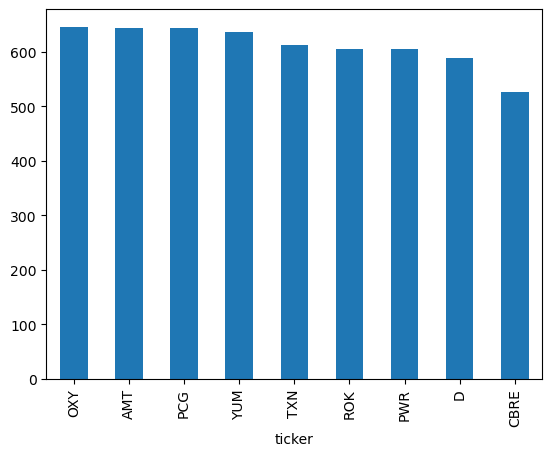

In [13]:
simple_sample_dt['ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='ticker'>

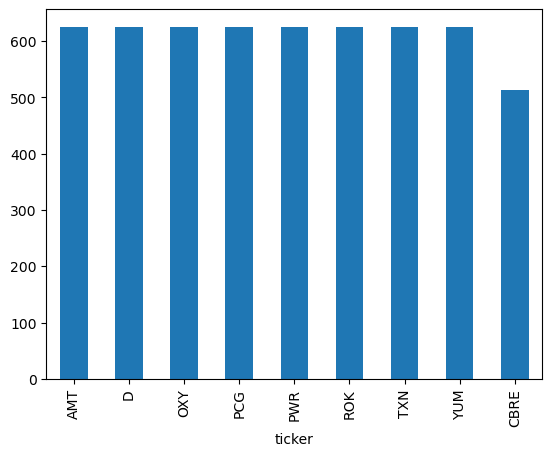

In [14]:
strat_sample_dt = small_df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\david\AppData\Local\Temp\ipykernel_13664\92420161.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='ticker'>

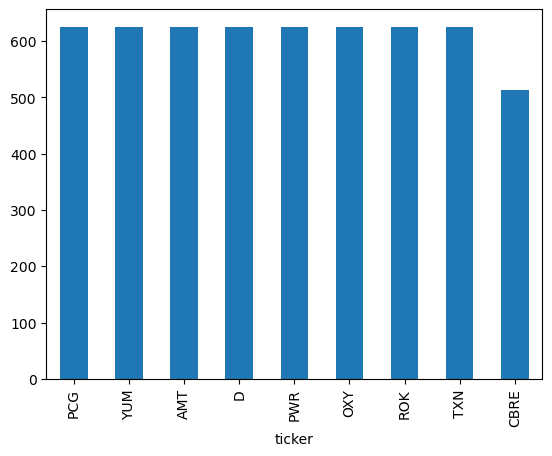

In [15]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt 
                      .groupby('ticker', group_keys = False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['ticker'].isin(select_tickers)]['ticker'].value_counts().plot(kind='bar')